In [13]:
import numpy as np
import matplotlib.pyplot as plt

class MySystem:
    def __init__(self, x, y, angle, dt=0.1):
        self.x, self.y, self.angle, self.dt = x, y, angle, dt

    def evolve(self):
        self.x += np.cos(self.angle) * self.dt
        self.y += np.sin(self.angle) * self.dt

    def update(self, d_angle):
        self.angle += d_angle * np.pi / 180

    def error(self):
        return self.y

class Pid:
    error0=0
    integral=0

    def __init__(self, ke, kd, ki, dt=0.1):
        self.ke, self.kd, self.ki, self.dt = ke, kd, ki, dt

    def correction(self, error):
        d_error = (error - self.error0) / self.dt
        self.error0 = error
        self.integral += error * self.dt
        return - (self.ke * error + self.kd * d_error + self.ki * self.integral)


def test_pid(ke, kd, ki):
    sys = MySystem(x=0, y=1, angle=0)
    pid = Pid(ke, kd, ki)
    out = []
    for i in range(2000):
        sys.evolve()
        correction = pid.correction(sys.error())
        sys.update(correction)
        out += [[sys.x, sys.y, sys.angle]]
    out=np.array(out)
    plt.plot(out[:,0], out[:,1])
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.show()

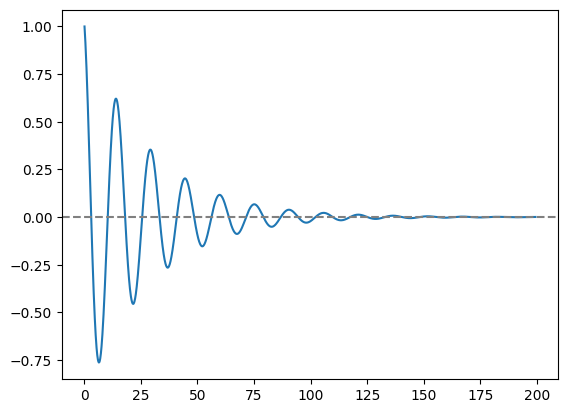

In [14]:
test_pid(ke=1, kd=1, ki=1/10)